**Introduction to the Data set :  OLYMPICS GAMES**


We are going to see the Athelets who participated and won different medals in Olympics which are happened in different years and its  analysis using Python. 
1. The modern Olympic Games or Olympics are leading international sports events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. 
2. The Olympic Games are considered the world’s top sports competition with more than 200 nations participating.

3. The total number of sports conducted in the different Olympic seasons are  49 . 

4. 110 countries athelets data we have in this data set

And for every event there are winners. Therefore various data is generated. So, by using Python we are going to  analyze the data.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Modules Used**

1) **Pandas**: It is used for analyzing the data.

2) **NumPy**: NumPy is a general-purpose array-processing package.

3) **Matplotlib**: It is a numerical mathematics extension NumPy.

4) **Seaborn**: It is used for visualization statistical graphics plotting in Python

## 1)	Please do the basic exploration of the data. Remember the dataset contains information from different years. So whatever steps you perform should make logical sense.

Reading the uploaded Olympics data which is in CSV file format with "pd.read_" function.

In [197]:
df=pd.read_csv('/content/olympics_data_22-05-2022.csv')

To understand the no.of records and no.of attributes in the given data set, we can use shape function.

In [198]:
df.shape

(8618, 10)

**Observations** :- By using "shape" function, in the given data set we have **8618 records and 10 attributes**

In [199]:
df.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


**Observations** :- We have 8600 + records, to view all the records it is waste of time and not required. To just have a look on what data we have, we can use head and tail functions to view the 1st 5 records and last 5 records simply to understand the data.

In [200]:
df.columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal'],
      dtype='object')

**Observations** :- We can use the above code to view the attributes(columns) of the given data set to have a glance on it. Sometimes, data set will have more than 10 attributes which is difficult to see all the columns.
So, it is easier way to understand the column names.

**Observations** :- 
I observed that the column name on "bronze_medal" is mistakenly written as "brone_medal".

So, we have to correct it for easy identification in feature process.

In [201]:
df.rename(columns = {'brone_medal':'bronze_medal'}, inplace = True)

### By using "rename" function we can rename the column names by passing it into a (Dictionary data structure) key and value type, and use "inplace = true" to reflect the change name Permanently in dataframe

**We confirm the column name changed by using df.columns function as below showed.**

In [202]:
df.columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'bronze_medal', 'total_medal'],
      dtype='object')

In [203]:
df.dtypes

name             object
age             float64
country          object
year              int64
Date_Given       object
sports           object
gold_medal        int64
silver_medal      int64
bronze_medal      int64
total_medal       int64
dtype: object

**Observations** :- **Data type summary**

5 integers (int64)

1 floating (float64)

4 objects (object)

**Observations** :- It is very important to us to understand the data in the given data set by seeing data types of the columns. By this, we can easily understand what type of data we got and what should be it is in real world to bring the better outputs out of it.

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   bronze_medal  8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


**Observations** :- "info" function gives us a view about null values, data types and the attributes we have in the given data set.

In [205]:
df.describe()

,age,year,gold_medal,silver_medal,bronze_medal,total_medal
count,8613.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,26.405434,2005.978881,0.364702,0.363309,0.377698,1.105709
std,5.102118,4.289946,0.545349,0.511613,0.505005,0.408892
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


**Observations** :- We have a flexibility to understand and to describe the whole data set by using simple function called "describe".

 It will gives us mean,standard deviation, percentiles like  25th,50th,75th and max values, where we can able to know only on numerical data columns.

In [206]:
df['Date_Given'] = pd.to_datetime(df['Date_Given'])

**Observations** :-

1)  After basic exploration of the data, we came to know that "Date_Given" column which have dates as data in different formats and the data type calling by the pandas in object. 

2) So, we have to set the data present in the Date_given column into a standard format. It means all the data in a column should of same format and the column should be in a correct data type.

3) That's why using "to_datetime" function we changed the data format and data type to the "Date_Given" column to "datetime" format and data to a unique format.

In [207]:
df.dtypes

name                    object
age                    float64
country                 object
year                     int64
Date_Given      datetime64[ns]
sports                  object
gold_medal               int64
silver_medal             int64
bronze_medal             int64
total_medal              int64
dtype: object


**Observations** :- So,we can see the "Date_Given" column data type is changed to "datetime" data type.


In [208]:
df['Date_Given'] = df['Date_Given'].astype(str)

**Observations** :- It is upto us according to the analysis requirements we can chnage the data types to "string or date" data type.

We can chech the datatypes also whether it is converted correctly or not by using "dtypes" function.

In [209]:
df.dtypes

name             object
age             float64
country          object
year              int64
Date_Given       object
sports           object
gold_medal        int64
silver_medal      int64
bronze_medal      int64
total_medal       int64
dtype: object

## 2)	Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.


In [210]:
df.isnull().sum()

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
bronze_medal    0
total_medal     0
dtype: int64

**Observations** :- Sometimes, in the data sets we have null values. It means some times we dont have data or empty records.

We can check the data set whether we have any missed data or not by using "isnull" function.

If, the data is not available we can fill it up with mean values or if the missed data is very small when compared to given data set records, we can delete or remove the null values also by using " dropna" function.

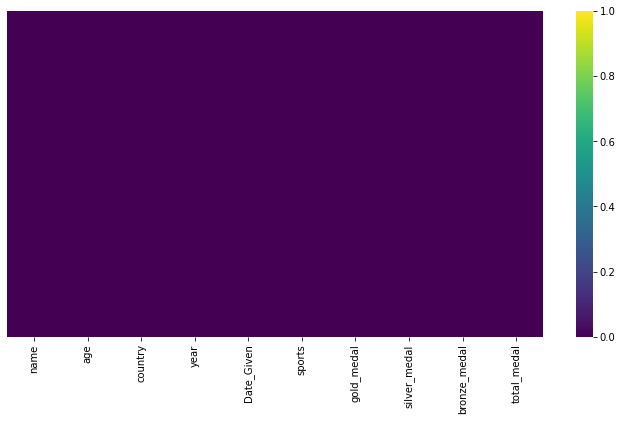

In [211]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(df.isnull(), cmap='viridis')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Observations** :- By using this heat map also we can easily view the whole data whethere we have any missing values present or not.

**The Yellow color line indicates in the heatmap depicts that, we have some missing values in the data set.**

So, we have to treat them accordingly.

In [212]:
[features for features in df.columns if df[features].isnull().sum()>0]

['name', 'age']

**Observations** :- If we have many no.of attributes, we can use a simple python code and check the columns have any missed values or not as like above.

So, as per above output 'name' and 'age' columns have missing values.

In [213]:
df.dropna(inplace = True)

**Observations** :- If we have very few data which is not available we can fill it up with mean values or if the missed data is very small when compared to given data set, we can delete or remove the null values also by using " dropna" function.

So, we came to know that only 5 records are missing out of 8000+ records. By deleting fron the data set it didn't alter anything during our analysing.

In [214]:
df.shape

(8613, 10)

**Observations** :- After removing null value records, we have **8613 records and 10 columns.**

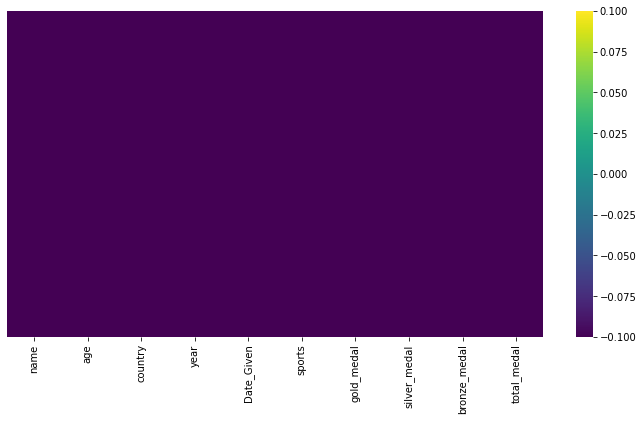

In [215]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(df.isnull(), cmap='viridis')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


**Observations** :- By using this heat map also we can easily view the whole data whethere we have any missing values present or not.

## 3)	Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.


In [216]:
duplicate = df[df.duplicated('name')]
duplicate.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,bronze_medal,total_medal
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
9,Natalie Coughlin,21.0,United States,2004,2004-08-29,Swimming,2,2,1,5
18,Ryan Lochte,24.0,United States,2008,2008-08-24,Swimming,2,0,2,4
21,Ian Thorpe,21.0,Australia,2004,2004-08-29,Swimming,2,1,1,4


In [217]:
duplicate.tail()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,bronze_medal,total_medal
8600,Yun Mi-Jin,21.0,South Korea,2004,2004-08-29,Archery,1,0,0,1
8601,Zhang Juanjuan,23.0,China,2004,2004-08-29,Archery,0,1,0,1
8604,Ilario Di Buò,43.0,Italy,2000,2000-10-01,Archery,0,1,0,1
8606,Michele Frangilli,24.0,Italy,2000,2000-10-01,Archery,0,1,0,1
8607,Jang Yong-Ho,24.0,South Korea,2000,2000-10-01,Archery,1,0,0,1


In [218]:
df.duplicated("name")

0       False
1        True
2        True
3       False
4       False
        ...  
8613    False
8614    False
8615    False
8616    False
8617    False
Length: 8613, dtype: bool

**Observations** :-  By using "duplicated" function we can check the data where the data is duplicated or repeated.

"True" means we have an athelete with the same name is repeated in the record.
So, before going to take action we must check the whole record like along all the columns to know the record clearly.

In [219]:
athelets_names=df.name.value_counts().index
athelets_names

Index(['Matt Wells', 'Jason Lezak', 'Sergey Tetyukhin', 'Leisel Jones',
       'Artur Taymazov', 'Katalin Kovács', 'Veronica Campbell-Brown',
       'Lucha Aymar', 'Pavol Hochschorner', 'Peter Hochschorner',
       ...
       'Kevin Light', 'Mike Lewis', 'Adam Kreek', 'Adam Korol',
       'Marek Kolbowicz', 'Melanie Kok', 'Jin Ziwei', 'Michal Jelinski',
       'Josh Inman', 'Rod White'],
      dtype='object', length=6955)

**Observations** :- Out of 8613 records we have 6955 unique names athelets
And 1658 athelets are again participated in the different olympic events or seasons.

## 4)	Please remove special characters from the name column.


In [220]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['name'] = df['name'].str.replace(char, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



**Observations** :- It is always a good practice that the data present in each and every column should be same data type and should be in same data format as well according to the columns present in the data set.

So, I found there are special characters in the "name" column, it creates noise in our analysation process.

By using a simple code we can able to remove the special characters with whatever we have to replace with in the place of special character. As used above is none, we can use underscore symbol or any space, should be meaningful.

**So, in the above I used string & replace functions, char operator, and foor loop to take each and every name individually and checked for the special characters to change into mormal one.**

In [221]:
df.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,bronze_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6


In [222]:
df.tail()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,bronze_medal,total_medal
8613,Olena Sadovnycha,32.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,2000-10-01,Archery,0,0,1,1
8616,Sandra WagnerSachse,31.0,Germany,2000,2000-10-01,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,2000-10-01,Archery,0,0,1,1


**Observations** :-  We can check the data set after removing the special characters in the columns "name" by seeing head and tail of the data set.

## 5)	Perform data visualization techniques to appropriate columns and explain them.  


In [223]:
df.columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'bronze_medal', 'total_medal'],
      dtype='object')

In [224]:
country_names=df.country.value_counts().index
country_names

Index(['United States', 'Russia', 'Germany', 'Australia', 'China', 'Canada',
       'Italy', 'Great Britain', 'France', 'Netherlands',
       ...
       'Guatemala', 'Costa Rica', 'Syria', 'Mauritius', 'Togo', 'Uruguay',
       'Macedonia', 'Gabon', 'United Arab Emirates', 'Barbados'],
      dtype='object', length=110)

In [225]:
athelets_names=df.name.value_counts().index
athelets_names

Index(['Matt Wells', 'Jason Lezak', 'Sergey Tetyukhin', 'Leisel Jones',
       'Artur Taymazov', 'Katalin Kovács', 'Veronica CampbellBrown',
       'Lucha Aymar', 'Pavol Hochschorner', 'Peter Hochschorner',
       ...
       'Kevin Light', 'Mike Lewis', 'Adam Kreek', 'Adam Korol',
       'Marek Kolbowicz', 'Melanie Kok', 'Jin Ziwei', 'Michal Jelinski',
       'Josh Inman', 'Rod White'],
      dtype='object', length=6955)

In [226]:
sports_names=df.sports.value_counts()
print("Total no.of sports conducted in different olympics seasons are:- "   , len(sports_names),'\n')
print(sports_names)


Total no.of sports conducted in different olympics seasons are:-  49 

Athletics                    687
Rowing                       567
Swimming                     487
Football                     407
Hockey                       386
Ice Hockey                   384
Handball                     351
Waterpolo                    306
Canoeing                     295
Basketball                   287
Volleyball                   278
Cycling                      261
Wrestling                    245
Fencing                      230
Judo                         224
Baseball                     216
Sailing                      210
Gymnastics                   194
Boxing                       188
Shooting                     181
Weightlifting                180
Equestrian                   157
Softball                     134
Cross Country Skiing         128
Diving                       113
Taekwondo                    112
Synchronized Swimming        109
Speed Skating                103
Short

In [227]:
country_medals_records=df.country.value_counts().values
print("No.of Countries they recorded medals are :-  ", len(country_medals_records))
country_medals_records

No.of Countries they recorded medals are :-   110


array([1109,  706,  552,  524,  450,  351,  307,  296,  287,  286,  274,
        259,  217,  195,  188,  167,  158,  139,  137,  132,  112,   97,
         92,   89,   87,   76,   75,   73,   70,   61,   59,   51,   42,
         39,   38,   38,   38,   36,   33,   31,   30,   27,   25,   24,
         24,   24,   23,   23,   22,   22,   21,   20,   20,   20,   19,
         18,   18,   17,   17,   16,   16,   15,   14,   13,   11,   10,
         10,   10,    9,    9,    8,    8,    6,    6,    5,    5,    4,
          4,    3,    3,    3,    3,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1])

([<matplotlib.patches.Wedge at 0x7f479fed1b90>,
 [Text(0.5541749762515121, 0.9502052913432107, 'United States'),
  Text(-1.016514681886543, 0.4203544950504283, 'Russia'),
  Text(-0.7736006400960894, -0.7820115406072476, 'Germany'),
  Text(0.2526894486632623, -1.0705830385982475, 'Australia'),
  Text(1.0029836365621148, -0.45168996533976247, 'China')],
 [Text(0.3022772597735521, 0.5182937952781149, '33.19%'),
  Text(-0.554462553756296, 0.22928427002750634, '21.13%'),
  Text(-0.4219639855069578, -0.4265517494221351, '16.52%'),
  Text(0.13783060836177943, -0.5839543846899531, '15.68%'),
  Text(0.5470819835793352, -0.2463763447307795, '13.47%')])

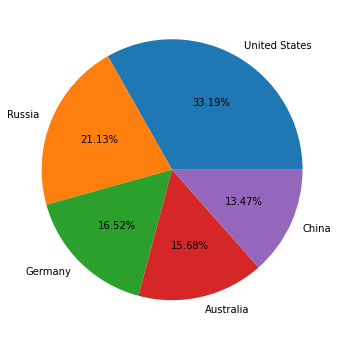

In [228]:
plt.pie(country_medals_records[:5],labels=country_names[:5],autopct='%1.2f%%')

**Observations** :- By ploting the above pie chart using "country" column, we can able to see which country have recorded,the no.of medalists in different olympic seasons.

As per as pie chart, we can say that

1) **America** recorded **highest** percentage(number of ) athelets with medals which have **33.19 %** as share out of 100 % . 

2) **Russia** recorded **Second highest** with **23.13 %** as share.

3) **Germany** recorded **Third highest** with **16.52 %** as share.

4) **Australia** recorded **Fourth highest** with **15.68 %** as share.

5) **China** recorded **Fifth highest** with **13.47 %** as share.


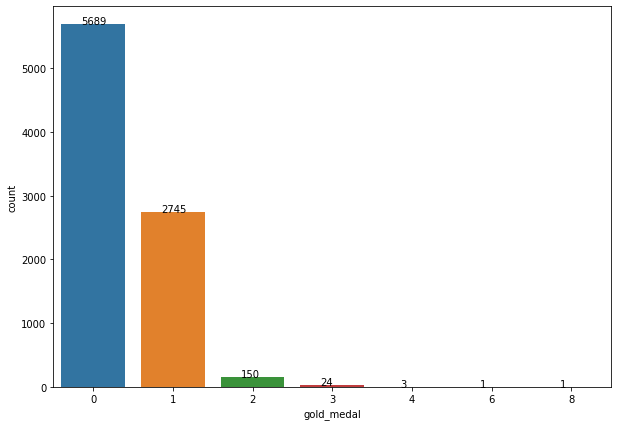

In [229]:
hfig = plt.figure(figsize =(10, 7))
ax=sns.countplot(x="gold_medal",data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observarions** 🇱
As per above chart, we can see that athelets with "0" Gold-medal are more in the given data set of number "5689".

Where as 2745 athelets got 1 Gold-medal

150 athelets got 2 gold-mdeals

24 athelets got 3 gold-medals

3 atheelets got 4 gold-medals

1 athelete got 6 gold-medals

1 athelete got 8 gold-medals

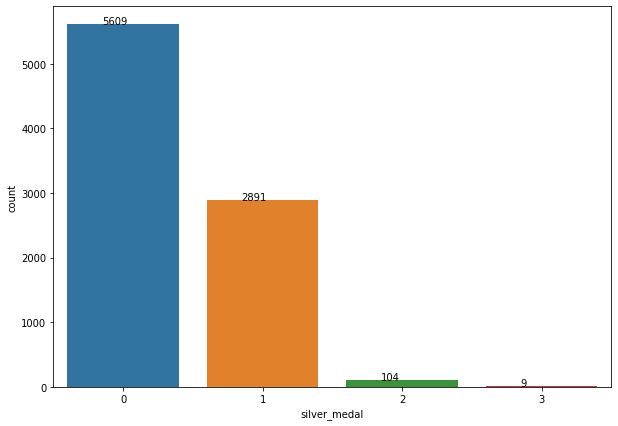

In [230]:
hfig = plt.figure(figsize =(10, 7))
ax=sns.countplot(x="silver_medal",data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observarions** 

As per above chart, we can see that athelets with "0" Silver-medal are more in the given data set of number "5609".

Where as 2891 athelets got 1 Silver-medal

104 athelets got 2 Silver-mdeals

9 athelets got 3 Silver-medals

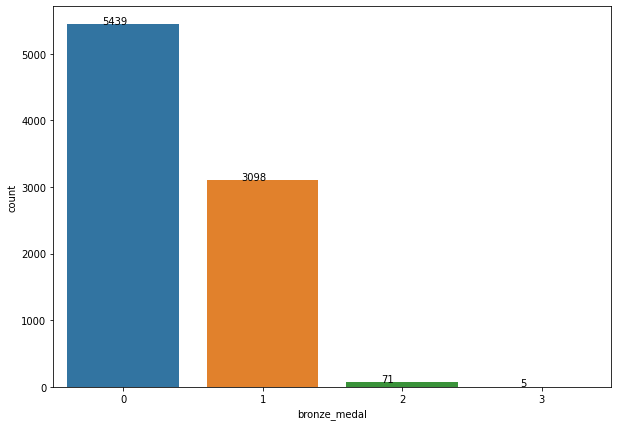

In [231]:
hfig = plt.figure(figsize =(10, 7))
ax=sns.countplot(x="bronze_medal",data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observarions** 

As per above chart, we can see that athelets with "0" Bronze-medal are more in the given data set of number "5439".

Where as 3098 athelets got 1 Bronze-medal

71 athelets got 2 Bronze-mdeals

5 athelets got 3 Bronze-medals

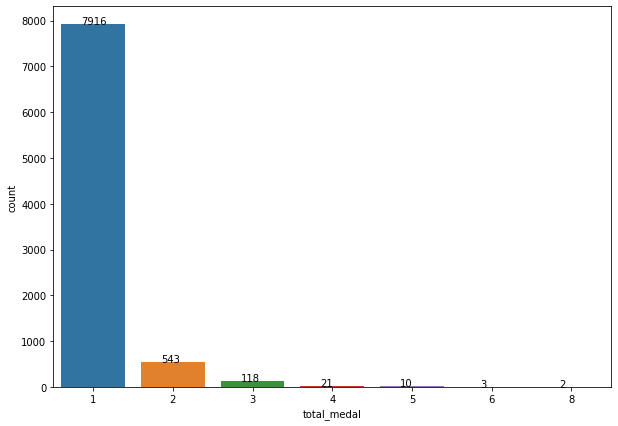

In [232]:
hfig = plt.figure(figsize =(10, 7))
ax=sns.countplot(x="total_medal",data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observarions** :-   

As per above chart, we can see that athelets with atleast "1" Medal are more in the given data set of number "7916".

543 athelets got 2 Medals

118 athelets got 3 Medals

21 athelets got 4 Medals

10 athelets got 5 Medals

3 atheletes got 6 Medals

2 athelete got 8 Medals

In [233]:
df.columns

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'bronze_medal', 'total_medal'],
      dtype='object')

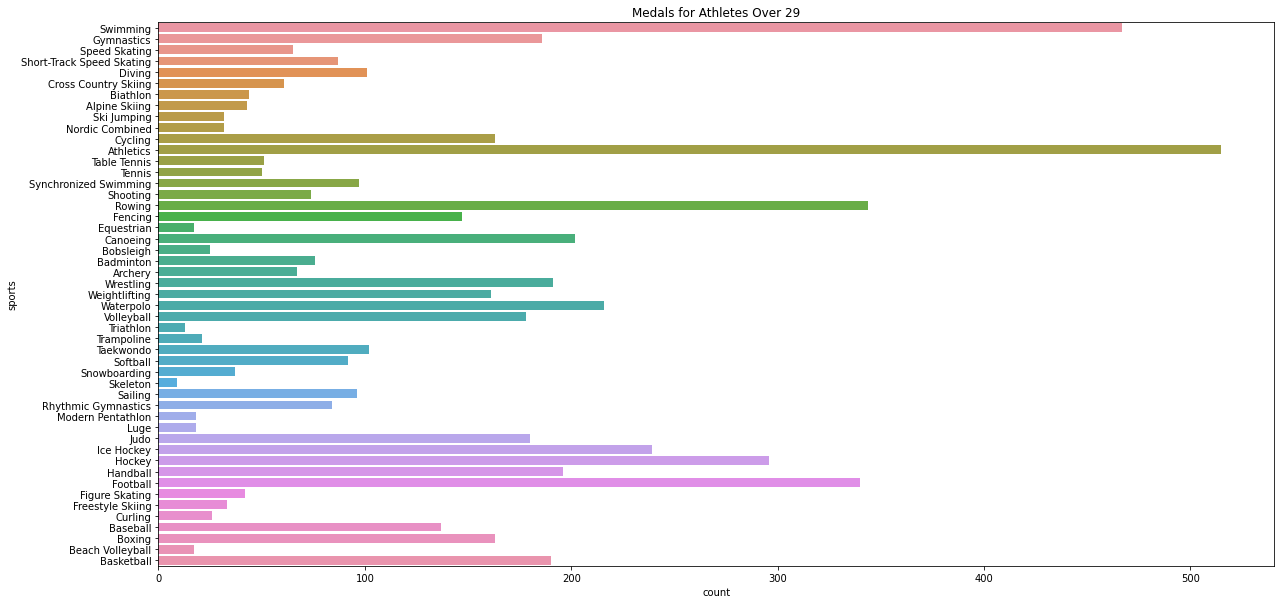

In [234]:
masterDisciplines = df['sports'][df['age'] < 29]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(y=masterDisciplines)
plt.title('Medals for Athletes Over 29')
plt.show()

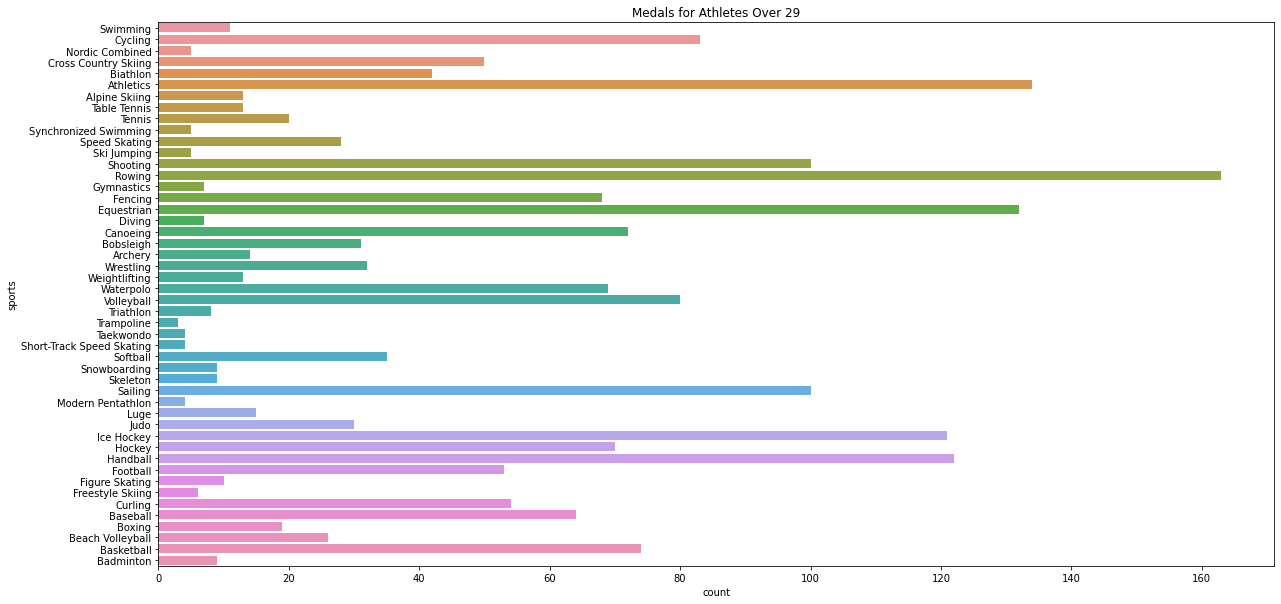

In [235]:
masterDisciplines = df['sports'][df['age'] > 29]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(y=masterDisciplines)
plt.title('Medals for Athletes Over 29')
plt.show()

           index  Medal
0  United States   1109
1         Russia    706
2        Germany    552
3      Australia    524
4          China    450


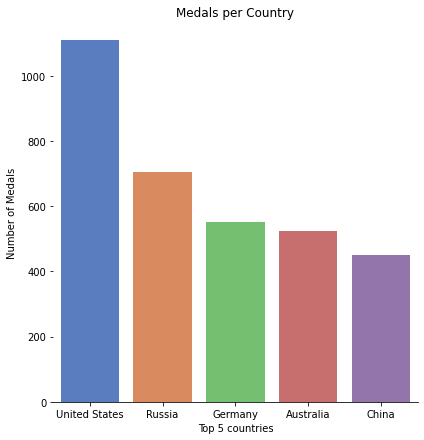

In [236]:
print(df.country.value_counts().reset_index(name='Medal').head())
 
totalGoldMedals = df.country.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



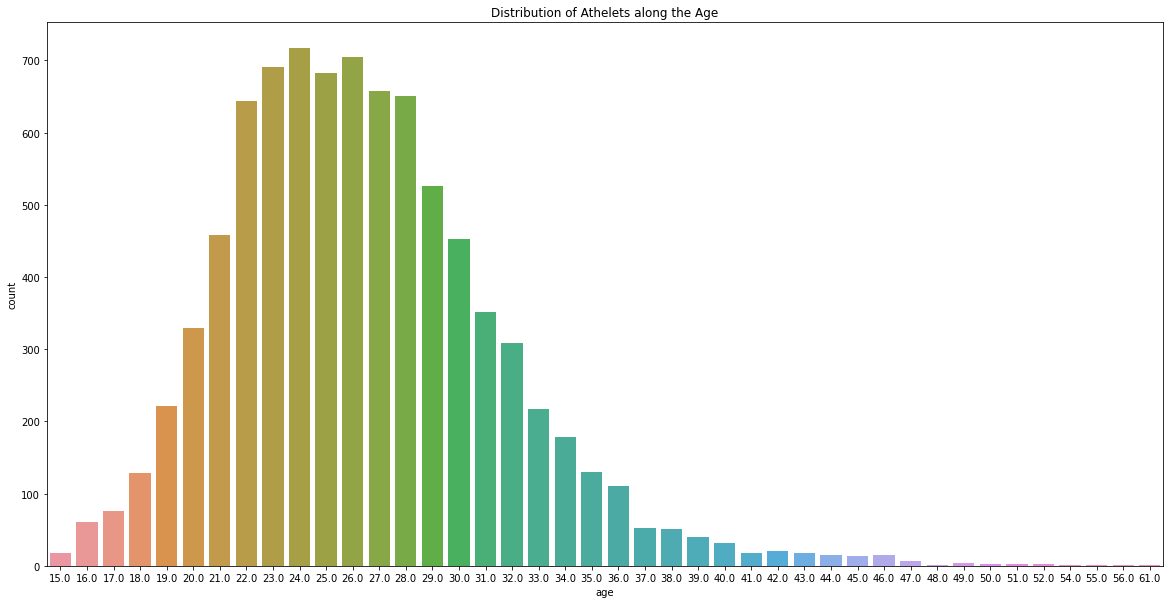

In [237]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Athelets along the Age')
sns.countplot(df['age'])
plt.show()


## 6)	Please check if the age dataset is skewed or symmetric. Based on results perform transformation.


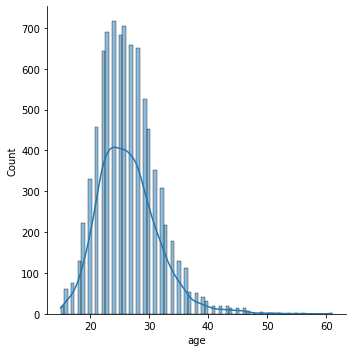

In [238]:
sns.displot(data=df,x='age',kde=True)

In [239]:
df["age"].describe()

count    8613.000000
mean       26.405434
std         5.102118
min        15.000000
25%        23.000000
50%        26.000000
75%        29.000000
max        61.000000
Name: age, dtype: float64

**Observations** :- We can see all the statistical measures to the column "age". However we didn't see the "IQR" and "Variance".

1) There is no such big diference between mean and median(50th percentile) it is very close to gether.

2) And there is a large difference or range between mean age(26.4) and max age(61). This creates skewness in the data and we have t0 treat outliers accordingly.

We will see those seperately with the help of **"scipy.stats"** package.

In [240]:
from scipy.stats import iqr
iqr(df['age'])

6.0

In [241]:
print(df.loc[:,'age'].var())

26.031610044743562


In [242]:
df.skew(axis = 0, skipna = True)[:1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



age    0.859007
dtype: float64

**Observations :-**  Skewness value for "age" field is **0.859** .
"Tenure Months" column is moderately skewed.
Because,

1.   A value between -0.5 and 0.5 indicates that the distribution is symmetrical.
2.   skewness value greater than 1 or less than -1 indicates a highly skewed distribution.

Note :- But, by plotting the age column, we can clearly see that there is a skew towards right. It means the "age" column data is "Partially Right skewed".

So, by doing appropriate statistical measures, we can remove or avoid the outliers present in the data.

In [243]:
import plotly.express as px
histfig = px.histogram(df, x="age")
histfig.show()

**Observations** :- The "age" column data does not follow a normal distribution. 

Since the data is skewed, instead of using a z-score we can use interquartile range (IQR) to determine the outliers.

In [244]:
boxplotfig = px.box(df, y="age")

boxplotfig.show()

Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score. Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 

Using the convenient pandas .quantile() function, we can create a simple Python function that takes in our column from the dataframe and outputs the outliers:

In [245]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

using .quantile() we can define Q1 and Q3. Next we calculate IQR, then we use the values to find the outliers in the dataframe. 

We will use the defined function to our age column to see the outliers perfectly.

In [246]:
outliers = find_outliers_IQR(df["age"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 192
max outlier value: 61.0
min outlier value: 39.0


64      41.0
438     46.0
439     40.0
440     44.0
441     45.0
        ... 
8569    51.0
8598    41.0
8604    43.0
8608    45.0
8610    39.0
Name: age, Length: 192, dtype: float64

**Observations** :-  
By seeing the data got with the help of the function
It is showing that,we have 192 outliers. Where, max outlier is 61.0 and min outlier is 39.0.
So, we have to treat these outliers. Because, 192 records are very small compared to 8600+ records.

We have three methods to deal with outliers.
1. Droping the outliers, according to our scenario it is not suggestable.
2. Capping the outliers, it is quite goood to set the data to do analysis.
3. Replacing the NAN values with mean value, here we didn't have any missing values. We just have outliers, which are very far from mean value.

So, 2nd option in suitable to us to treat outliers.
In this technique, we essentially set a limit for the min and max outlier values. Anything above or below the cap gets set to the capped min or max respectively. For example, if we set the cap max for age at 39, any outlier above 39 will be set to 39. This technique is used when you can assume that all outliers express the same behaviors or patterns, meaning the model wouldn’t learn anything new by allowing the outliers to remain. 

To cap the outliers, calculate a upper limit and lower limit. For the upper limit, we will use the mean plus three standard deviations. For the lower limit, we will calculate it as the mean minus 3 standard deviations. Keep in mind, the calculation you use can depend on the data’s distribution. 



In [247]:
upper_limit = df["age"].mean() + 3*df["age"].std()

print("upper_limit :- ",upper_limit)

lower_limit = df["age"].mean() - 3*df["age"].std()

print("lower_limit :- ", lower_limit)


upper_limit :-  41.71178822269718
lower_limit :-  11.099079070928727


**Observations** :- 

Based on our calculated limits, any outliers above 41.71 will be set to 41.71. Likewise, any outlier below 11 will be set to 11. 

After calculating the upper and lower limit, we use the numpy .where() function to apply the limits to "age". 


In [248]:
df["age"] = np.where(df["age"] > upper_limit,
   upper_limit,
   np.where(df["age"] < lower_limit,lower_limit,df["age"]))

We can use .describe() to verify the min and max values have been capped as expected:

In [249]:
df.describe()[["age"]]

,age
count,8613.000000
mean,26.363441
std,4.945581
min,15.000000
25%,23.000000
50%,26.000000
75%,29.000000
max,41.711788


In [250]:
import plotly.express as px
histfig = px.histogram(df, x="age")
histfig.show()

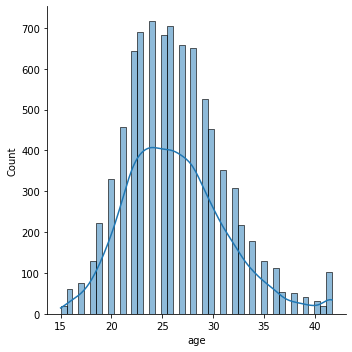

In [251]:
sns.displot(data=df,x='age',kde=True)

## **Observations**  :- **Now, we can see that the age column data is Normally distributed.**

## 7)	Please perform appropriate numerical measures on each column and report them accordingly.


In [252]:
df.describe()

,age,year,gold_medal,silver_medal,bronze_medal,total_medal
count,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000
mean,26.363441,2005.975386,0.364914,0.362940,0.377917,1.105770
std,4.945581,4.288737,0.545436,0.511531,0.505069,0.409003
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,41.711788,2012.000000,8.000000,3.000000,3.000000,8.000000


**Observations :-**  

By using "describe" function we can easily check the data distribution of the numerical columns of a data set.

Numerical measures are mean, standard deviation, Minimum and Maximum values, Percentiles where the most data is recorded among the given data set.

1. According to age column, we have equal percentage of athelets according to age's.

2. We can see the data given on different years and olympic seasons are from 2000 to 2012.

3. Most likely more no.of Athelets won max no.of gold medals that is 8.
Where Silver and Bronze only 3 medals.


In [253]:
df.describe(include='all')

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,bronze_medal,total_medal
count,8613,8613.000000,8613,8613.000000,8613,8613,8613.000000,8613.000000,8613.000000,8613.000000
unique,6955,NaN,110,NaN,7,49,NaN,NaN,NaN,NaN
top,Matt Wells,NaN,United States,NaN,2008-08-24,Athletics,NaN,NaN,NaN,NaN
freq,4,NaN,1109,NaN,1872,687,NaN,NaN,NaN,NaN
mean,NaN,26.363441,NaN,2005.975386,NaN,NaN,0.364914,0.362940,0.377917,1.105770
std,NaN,4.945581,NaN,4.288737,NaN,NaN,0.545436,0.511531,0.505069,0.409003
min,NaN,15.000000,NaN,2000.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,23.000000,NaN,2002.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
50%,NaN,26.000000,NaN,2006.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
75%,NaN,29.000000,NaN,2010.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000


**Observations** :- We can see the overall statistcial values for all the columns whether it is numerical or categorical columns.

## 8)  list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

In [254]:
Top10_countries_with_Heighestnum_goldmedals= pd.DataFrame(df.groupby(['country'])['gold_medal'].sum())
Top10_countries_with_Heighestnum_goldmedals.sort_values(by=['gold_medal'],inplace=True,ascending=False)
Top10_countries_with_Heighestnum_goldmedals[:10]

,gold_medal
country,
United States,552
Russia,234
China,234
Germany,223
Canada,168
Australia,163
Great Britain,124
South Korea,110
France,108


In [255]:
Top10_countries_with_Heighestnum_silvermedals= pd.DataFrame(df.groupby(['country'])['silver_medal'].sum())
Top10_countries_with_Heighestnum_silvermedals.sort_values(by=['silver_medal'],inplace=True,ascending=False)
Top10_countries_with_Heighestnum_silvermedals[:10]

,silver_medal
country,
United States,440
Australia,226
Russia,221
Germany,183
China,156
Netherlands,135
Spain,116
Japan,112
France,107


In [256]:
Top10_countries_with_Heighestnum_bronzemedals= pd.DataFrame(df.groupby(['country'])['bronze_medal'].sum())
Top10_countries_with_Heighestnum_bronzemedals.sort_values(by=['bronze_medal'],inplace=True,ascending=False)
Top10_countries_with_Heighestnum_bronzemedals[:10]

,bronze_medal
country,
United States,320
Russia,313
Germany,223
Australia,220
Italy,142
China,140
Japan,113
South Korea,105
Canada,104


In [257]:
Top10_countries_with_Heighestnum_totalmedals= pd.DataFrame(df.groupby(['country'])['total_medal'].sum())
Top10_countries_with_Heighestnum_totalmedals.sort_values(by=['total_medal'],inplace=True,ascending=False)
Top10_countries_with_Heighestnum_totalmedals[:10]

,total_medal
country,
United States,1312
Russia,768
Germany,629
Australia,609
China,530
Canada,370
Italy,331
Great Britain,322
France,318


**Observations** :-  

 We can see from all the 4 data frames like Gold,Silver,Bronze and Total no.of mefdals won by different countries by thier corresponding athelets.

1. United states top's at every where in all Medals like 
Gold   - 552, 
Silver - 440,
Bronze - 320,
and
Total - 1312 medals

2. **GOLD MEDAL**

Where as 2nd place for Highest no.of gold-medals is Australia - 226.

Where as 3rd place for Highest no.of gold-medals  is Russia - 221.

Where as 4th place for Highest no.of gold-medals  is Germany - 183.


3. **SILVER MEDAL**

Where as 2nd place for Highest no.of Silver-medals  is Russia - 313.

Where as 3rd place for Highest no.of Silver-medals  is Germany - 223.

Where as 4th place for Highest no.of Silver-medals  is Australia - 220.


4. **TOTAL MEDALS**

Where as 2nd place for Highest no.of Total-medals  is Russia - 768.

Where as 3rd place for Highest no.of Total-medals  is  Germany - 629.

Where as 4th place for Highest no.of Total-medals  is Australia - 609.


In [258]:
df.to_csv(r'D:\A\Odinschool\Capstone on SQL-Python -DS-PySpark _23-05-2022\my_olympics_data_31-05-2022.csv', index=False)